# Anyone AI

# Project III - Home Credit Default Risk

You've been learning a lot about Machine Learning Algorithms, now we you're gonna be asked to put it all together. 

You will create a complete pipeline to preprocess the data, train your model and then predict values for the [Home Credit Default Risk](https://www.kaggle.com/competitions/home-credit-default-risk/) Kaggle competition.

## Introduction

Kaggle is a web platform and community for data scientist and machine learning engineers where competetitions and datasets are regularly published.

This particular competition is a binary Classification task: we want to predict whether the person applying for a home credit will be able to repay its debt or not. The competition finished 4 years ago, so you will find a lot of blog posts and code written for it, we encourage you to read everything you can about it.

The dataset is composed of multiple files with different information about loands taken. In this project we're going to exclusively work with the main files: application_train.csv and application_test.csv.

The competition uses [Area Under the ROC Curve](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc?hl=es_419) as the evaluation metric, so our models will have to return the probabilities that a loan is not paid for each row.

### Getting the data

1- Login to Kaggle (if you don't have an account you'll have to register to get it) and download the [complete dataset](https://www.kaggle.com/competitions/home-credit-default-risk/data). Read the information about the data. What does a row in the main file represent? What does the target variable means?

One row represents one loan in our data sample.
The target variable says wether the loan was repaid (0) or not (1)

2- Load the training and test datasets, we're only going to work withe "application_train.csv" and "application_test.csv" for now

In [43]:
### Complete in this cell: Loading the dataset

import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from google.colab import drive
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [44]:
data_credit_train = pd.read_csv('/content/application_train.csv')
data_credit_test = pd.read_csv('/content/application_test.csv')

In [45]:
x_data_credit_train = data_credit_train.drop(columns=['TARGET','SK_ID_CURR'])
y_data_credit_train = data_credit_train['TARGET']
x_data_credit_test = data_credit_test.drop(columns=['SK_ID_CURR'])

### Exploratory Data Analysis

A lot of the analysis of the data can be found on public available Kaggle kernels or blog posts, but you need to make sure you understand the datasets properties before starting working on it, so we'll do exploratory data analysis for the main files

**Dataset Basics**

1- Show the shape of the training and test datasets.

In [46]:
### Complete in this cell: shape of the dataset

print(x_data_credit_train.shape)
print(x_data_credit_test.shape)

(307511, 120)
(48744, 120)


2- List all columns in the train dataset

In [47]:
### Complete in this cell: Show all columns in the training dataset 

pd.set_option('display.max_columns', None)
x_data_credit_train.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

3- Show the first 5 records of the training dataset, transpose the dataframe to see each record as a column and features as rows, make sure all features are visualized. Take your time to review what kind of information you can gather from this data.

In [48]:
### Complete in this cell: show first 5 records in a transposed table

firstf_data = x_data_credit_train[:5]
pd.set_option('display.max_rows', None)
firstf_data.T

,0,1,2,3,4
NAME_CONTRACT_TYPE,Cash loans,Cash loans,Revolving loans,Cash loans,Cash loans
CODE_GENDER,M,F,M,F,M
FLAG_OWN_CAR,N,N,Y,N,N
FLAG_OWN_REALTY,Y,N,Y,Y,Y
CNT_CHILDREN,0,0,0,0,0
AMT_INCOME_TOTAL,202500.0,270000.0,67500.0,135000.0,121500.0
AMT_CREDIT,406597.5,1293502.5,135000.0,312682.5,513000.0
AMT_ANNUITY,24700.5,35698.5,6750.0,29686.5,21865.5
AMT_GOODS_PRICE,351000.0,1129500.0,135000.0,297000.0,513000.0
NAME_TYPE_SUITE,Unaccompanied,Family,Unaccompanied,Unaccompanied,Unaccompanied


4- Show the distribution of the target variable values: print the total value count and the percentage of each value, plot this relationship.

In [49]:
### Complete in this cell: show distribution of target variable

trgt = y_data_credit_train
counts = trgt.value_counts()
percent100 = trgt.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'percentage': percent100})

,counts,percentage
0,282686,91.9%
1,24825,8.1%


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of Target Variable')

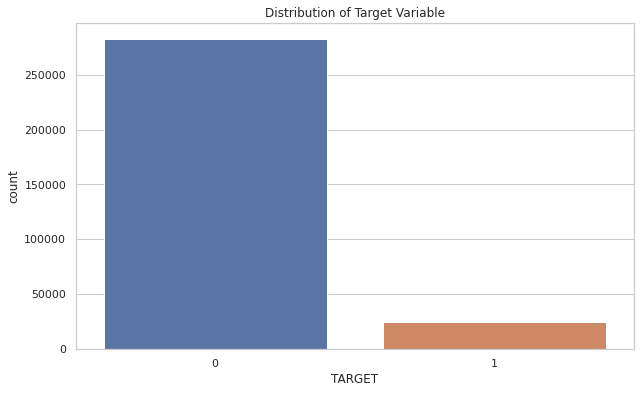

In [50]:
plt.figure(figsize=(10,6))
sns.countplot('TARGET', data=data_credit_train).set_title('Distribution of Target Variable')

5- Show the number of columns of each data type

In [51]:
### Complete in this cell: show number of columns per data type

x_data_credit_train.dtypes.value_counts()

float64    65
int64      39
object     16
dtype: int64

6- For categorical variables, show the number of distinct values in each column (number of labels)

In [52]:
### Complete in this cell: show number of unique values per categorical column

x_data_credit_train.select_dtypes(exclude=["number"]).nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

7- Analyzing missing data: show the percentage of missing data for each column ordered by percentage descending (show only the 20 columns with higher missing pct)

In [53]:
### Complete in this cell: checking missing data

print(round((x_data_credit_train.isnull().sum() * 100/ len(x_data_credit_train)),2).sort_values(ascending=False)[:20])

COMMONAREA_MODE             69.87
COMMONAREA_MEDI             69.87
COMMONAREA_AVG              69.87
NONLIVINGAPARTMENTS_MEDI    69.43
NONLIVINGAPARTMENTS_AVG     69.43
NONLIVINGAPARTMENTS_MODE    69.43
FONDKAPREMONT_MODE          68.39
LIVINGAPARTMENTS_AVG        68.35
LIVINGAPARTMENTS_MODE       68.35
LIVINGAPARTMENTS_MEDI       68.35
FLOORSMIN_AVG               67.85
FLOORSMIN_MEDI              67.85
FLOORSMIN_MODE              67.85
YEARS_BUILD_MODE            66.50
YEARS_BUILD_AVG             66.50
YEARS_BUILD_MEDI            66.50
OWN_CAR_AGE                 65.99
LANDAREA_MEDI               59.38
LANDAREA_MODE               59.38
LANDAREA_AVG                59.38
dtype: float64


**Analyzing distribution of variables**

1- Show the distribution of credit amounts

[Text(0.5, 1.0, 'Distibution of Credit Amount in Millions of USD')]

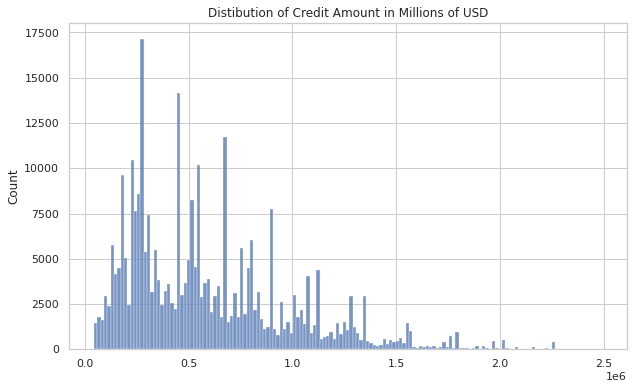

In [54]:
### Complete in this cell: distribution of credit amounts

### I am setting a threshold of $ 2.5 MDD to visualize better the data, without the outliers.
h=sorted(x_data_credit_train['AMT_CREDIT'])
out_threshold= 2500000.0
h=[i for i in h if i<out_threshold]

plt.figure(figsize=(10,6))
sns.histplot(data=h).set(title="Distibution of Credit Amount in Millions of USD")

2- Plot the education level of the credit applicants, show the percentages of each category. Also print the total counts for each category.

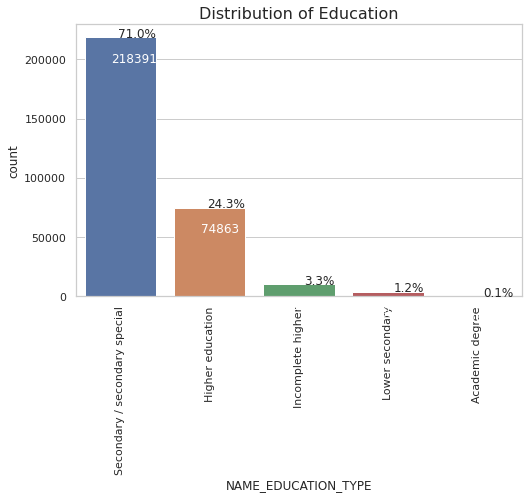

In [55]:
### Complete in this cell: level of education plot

sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(x_data_credit_train))
ax = sns.countplot(x="NAME_EDUCATION_TYPE", data=x_data_credit_train)
plt.title('Distribution of Education', fontsize=16)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.3, p.get_height()), ha='left', va='top', color='white', size=12)
plt.xticks(rotation=90)
plt.show()

In [56]:
x_data_credit_train['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

3- Plot the distribution of ocupation of the loan applicants

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

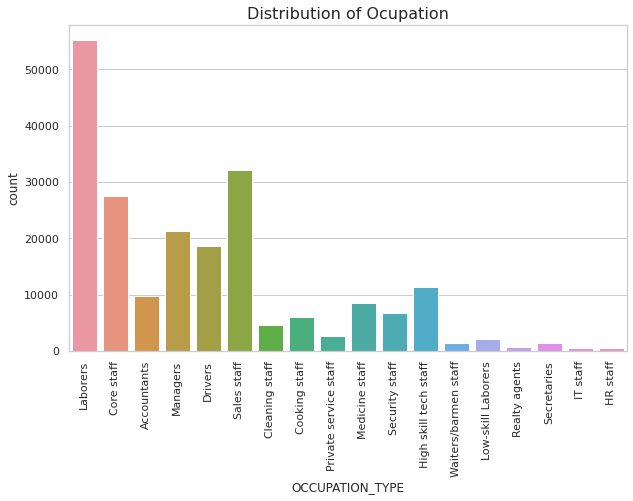

In [57]:
### Complete in this cell: ocupation of applicants

plt.figure(figsize=(10,6))
sns.countplot('OCCUPATION_TYPE', data=x_data_credit_train).set_title('Distribution of Ocupation', fontsize=16)
plt.xticks(rotation=90)

4- Plot the family status of the applicants

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

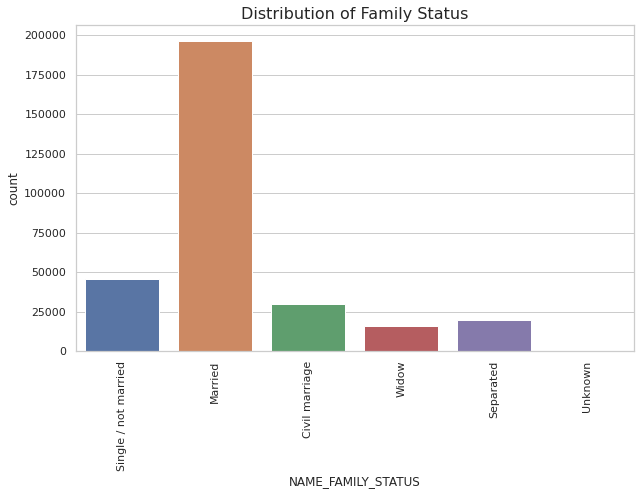

In [58]:
### Complete in this cell: family status

plt.figure(figsize=(10,6))
sns.countplot('NAME_FAMILY_STATUS', data=x_data_credit_train).set_title('Distribution of Family Status', fontsize=16)
plt.xticks(rotation=90)

5- Plot the income type of applicants grouped by the target variable

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

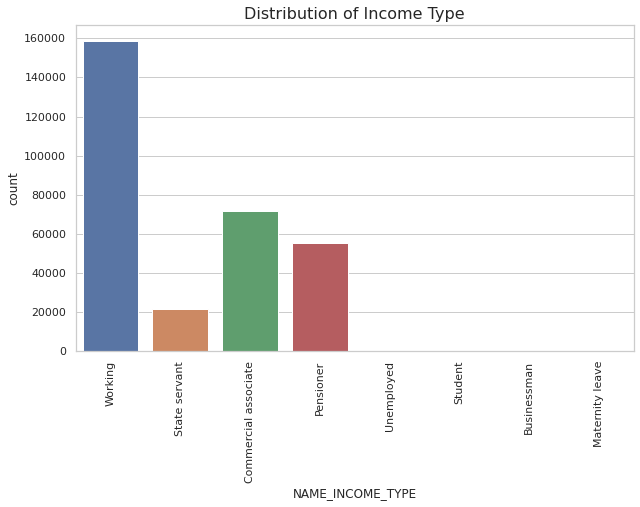

In [59]:
### Complete in this cell: Income type of applicants by target variable

plt.figure(figsize=(10,6))
sns.countplot('NAME_INCOME_TYPE', data=x_data_credit_train).set_title('Distribution of Income Type', fontsize=16)
plt.xticks(rotation=90)

## Preprocessing

In this section, you will code a function to make all the data pre processing for the dataset. What you have to deliver is a function that takes the train and test dataframes, processes all features, and returns the transformed data as numpy arrays ready to be used for training.

The function should perform these activities:

- Correct outliers/anomalous values in numerical columns (hint: take a look at the DAYS_EMPLOYED column)
- Impute values for all columns with missing data (use median as imputing value)
- Encode categorical features:
    - If feature has 2 categories encode using binary encoding
    - More than 2 categories, use one hot encoding 
- Feature scaling

Keep in mind that you could get different number of columns in train and test because some category could only be present in one of the dataframes, this could create more one hot encoded columns. You should align train and test to have the same number of columns

In [60]:
# First I am creating some variables in order to separate numerical, categorical, binary and non-binary features.
# I am doing this so I can call specific features later.

org_num_cols = data_credit_train.select_dtypes("number").columns.tolist()
num_cols =  x_data_credit_train.select_dtypes("number").columns.tolist()
obj_cols = x_data_credit_train.select_dtypes(exclude="number").columns.tolist()
binary_cols = x_data_credit_train[obj_cols].loc[:, x_data_credit_train[obj_cols].nunique() == 2].columns.tolist()
multv_cols = x_data_credit_train[obj_cols].loc[:, x_data_credit_train[obj_cols].nunique() >= 3].columns.tolist()

In [61]:
# Complete in this cell: Data pre processing function    

def clean_outliers(x_data_credit_train, x_data_credit_test):

    '''
    The purpose of this Function is to:
    1) Replace the Outlier of the Pensioners who have 365,243 days employed, filling that with nan.
    2) Replace the Outlier of the 117 million USD with nan.
    3) Replace the value 'XNA' for nan, as this is an anomalous value.
        
    '''   
    x_data_credit_train['DAYS_EMPLOYED'] = x_data_credit_train['DAYS_EMPLOYED'].replace({365243: np.nan})
    x_data_credit_train['AMT_INCOME_TOTAL'] = x_data_credit_train['AMT_INCOME_TOTAL'].replace({117000000: np.nan})
    x_data_credit_train = x_data_credit_train.replace(['XNA'], np.nan)
    x_data_credit_test['DAYS_EMPLOYED'] = x_data_credit_test['DAYS_EMPLOYED'].replace({365243: np.nan})
    x_data_credit_test = x_data_credit_test.replace(['XNA'], np.nan)

    return x_data_credit_train, x_data_credit_test

In [62]:
def impute_values(x_data_credit_train, x_data_credit_test):

    '''
    The purpose of this Function is to:
    1) Call the SimpleImputer to replace missing values with median for numerical and most frecquent for strings.
    2) Fit the numerical data with the Imputer specially created for numerical, applying to ("num_cols").
    3) Fit the categorical data with the Imputer specially created for categorical, applying to ("obj_cols").
        
    '''   

    num_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    str_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

    x_data_credit_train[num_cols] = num_imputer.fit_transform(x_data_credit_train[num_cols])
    x_data_credit_train[obj_cols] = str_imputer.fit_transform(x_data_credit_train[obj_cols])
    x_data_credit_test[num_cols] = num_imputer.transform(x_data_credit_test[num_cols])
    x_data_credit_test[obj_cols] = str_imputer.transform(x_data_credit_test[obj_cols])

    return x_data_credit_train, x_data_credit_test

In [63]:
def encode_categorical(x_data_credit_train, x_data_credit_test):

    '''
    The purpose of this Function is to:
    1) Call the OneHotEncoder to encode all categorical values.
    2) Create a variable to store the names of the columns and apply to dataframe.
    3) Drop the original columns that were encoded.
        
    '''   

    ohe = OneHotEncoder(sparse=False, categories='auto', drop='first')

    encoded_train = ohe.fit_transform(x_data_credit_train[obj_cols])
    featnames_train = ohe.get_feature_names_out()
    x_data_credit_train[featnames_train] = encoded_train

    encoded_test = ohe.transform(x_data_credit_test[obj_cols])
    featnames_test = ohe.get_feature_names_out()
    x_data_credit_test[featnames_test] = encoded_test

    x_data_credit_train.drop(columns = list(obj_cols), inplace = True)
    x_data_credit_test.drop(columns = list(obj_cols), inplace = True)

    return x_data_credit_train, x_data_credit_test

In [64]:
def scale_feats(x_data_credit_train, x_data_credit_test):

    '''
    The purpose of this Function is to:
    1) Call the StandardScaler to scale the data.
    2) Fit and transform the train data, with the scaler.
    3) Transform the test data.
        
    '''   

    credit_scaler = StandardScaler()
    
    x_data_credit_train = credit_scaler.fit_transform(x_data_credit_train)
    x_data_credit_test = credit_scaler.transform(x_data_credit_test)

    return x_data_credit_train, x_data_credit_test

In [65]:
# This is the FINAL function...

def preproces_func(x_data_credit_train, x_data_credit_test):

    '''
    The purpose of this Function is to:
    1) Apply all the previous functions to clean outliers, impute missing values, encode and scale the data.
    2) Bring the original dataframes with all these changes applied.
        
    '''   

    x_data_credit_train, x_data_credit_test = clean_outliers(x_data_credit_train, x_data_credit_test)
    x_data_credit_train, x_data_credit_test = impute_values(x_data_credit_train, x_data_credit_test)
    x_data_credit_train, x_data_credit_test = encode_categorical(x_data_credit_train, x_data_credit_test)
    x_data_credit_train, x_data_credit_test = scale_feats(x_data_credit_train, x_data_credit_test)

    return x_data_credit_train, x_data_credit_test

In [66]:
x_data_credit_train, x_data_credit_test = preproces_func(x_data_credit_train, x_data_credit_test)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


## Training Models

As usual, you will start training simple models and will progressively move to more complex models and pipelines.

### Baseline: LogisticRegression

1- Import LogisticRegression from sklearn and train a model using the preprocesed train data from the previous section, and just default parameters. If you receive a warning because the algorithm failed to converge, try increasing the number of iterations or decreasing the C parameter 

In [67]:
### Complete in this cell: train a logistic regression

from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression()
logreg_model.fit(x_data_credit_train, y_data_credit_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

2- Use the trained model to predict probabilites for the test data, and then save the results to a csv in the format expected in the competition: a SK_ID_CURR column and a TARGET column with probabilities. REMEMBER: the TARGET columns should ONLY contain the probabilities that the debt is not repaid (equivalent to the class 1).

In [ ]:
### Complete in this cell: predict test data and save csv

In [69]:
lr_cred_proba = logreg_model.predict_proba(x_data_credit_test)

proba_col_lr = pd.DataFrame(lr_cred_proba)
proba_col_lr.rename(columns = {0:'Predict', 1:'TARGET'}, inplace = True)
proba_col_lr = proba_col_lr.drop(['Predict'], axis=1)
proba_col_lr['SK_ID_CURR'] = data_credit_test['SK_ID_CURR']
proba_col_lr.to_csv("credit_proba_abe_lr.csv", index=False)

3- Go to the Kaggle competition, and in the [submissions page](https://www.kaggle.com/competitions/home-credit-default-risk/submit) load your csv file. Report here the result in the private score you obtained.

In [ ]:
# The obtained score was 0.73406

At this point, the model should produce a result around 0.67 

### Training a Random Forest Classifier 

You're gonna start working in more complex models: ensambles, particularly, you're going to use the Random Forest Classifier from Scikit Learn. 

1- Train a RandomForestClassifier, print the time taken by the fit function. Just use default hyperparameters, except for n_jobs, which should be set to "-1" to allow the library to use all CPU cores to speed up training time.

In [70]:
### Complete in this cell: train a RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

ranfor_model = RandomForestClassifier(n_jobs = -1)
ranfor_model.fit(x_data_credit_train, y_data_credit_train)

RandomForestClassifier(n_jobs=-1)

2- Use the classifier to predict probabilities on the test set, and save the results to a csv file.

In [71]:
### Complete in this cell: predict test data and save csv

rf_cred_proba = ranfor_model.predict_proba(x_data_credit_test)

proba_col_rf = pd.DataFrame(rf_cred_proba)
proba_col_rf.rename(columns = {0:'Predict', 1:'TARGET'}, inplace = True)
proba_col_rf = proba_col_rf.drop(['Predict'], axis=1)
proba_col_rf['SK_ID_CURR'] = data_credit_test['SK_ID_CURR']
proba_col_rf.to_csv("credit_proba_abe_rf.csv", index=False)

3- Load the predictions to the competition. Report the private score here.

In [ ]:
### Complete in this cell: report your score on Kaggle
# This model should have a private score around 0.68 

In [ ]:
# The obtained score was 0.69693

### Randomized Search with Cross Validation

So far, we've only created models using the default hyperparameters of each algorithm. This is usually something that we would only do for baseline models, hyperparameter tuning is a very important part of the modeling process and is often the difference between having an acceptable model or not.

But, there are usually lots of hyperparameters to tune and a finite amount of time to do it, you have to consider the time and resources it takes to find an optimal combination of them. In the previous section you trained a random forest classifier and saw how much it took to train it once in your PC. If you want to do hyperparameter optimization you now have to consider that you will have to train the algorithm N number of times, with N being the cartesian product of all parameters. 

Furthermore, you can't validate the performance of your trained models on the test set, as this data should only be used to validate the final model. So we have to implement a validation strategy, K-Fold Cross Validation being the most common. But this also adds time complexity to our training, because we will have to train each combinations of hyperparameters M number of times, X being the number of folds in which we divided our dataset, so the total number of training iterations will be NxM... this resulting number can grow VERY quickly.

Fortunately there are strategies to mitigate this, here you're going to select a small number of hyperparameters to test a RandomForestClassifier, and use a Randomized Search algorithm with K-Fold Cross Validation to avoid doing a full search across the grid. 

Remember: take in consideration how much time it took to train a single classifier, and define the number of cross validations folds and iterations of the search accordingly. 
A recommendation: run the training process, go make yourself a cup of coffee, sit somewhere comfortably and forget about it for a while.


1- Use RandomizedSearchCV to find the best combination of hyperparameters for a RandomForestClassifier. The validation metric used to evaluate the models should be "roc_auc".

In [72]:
from sklearn.model_selection import RandomizedSearchCV

ranfor_model_cv = RandomForestClassifier()

In [73]:
### Complete in this cell: Use RandomizedSearchCV to find the best combination of hyperparameters for a RandomForestClassifier

example_hyperparameter_grid = {
 'bootstrap': [True, False],
 'max_depth': [10, 50, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200]
}

randsearch_model_cv = RandomizedSearchCV(ranfor_model_cv, example_hyperparameter_grid, n_iter=2, cv=3, scoring="roc_auc", random_state=42)

In [74]:
best_parameters = randsearch_model_cv.fit(x_data_credit_train, y_data_credit_train)

In [75]:
best_parameters.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

2- Use the classifier to predict probabilities on the test set, and save the results to a csv file.

In [76]:
ranfor_model_best = RandomForestClassifier(bootstrap = True, 
                                           max_depth = 100,
                                           max_features = 'sqrt',
                                           min_samples_leaf = 4,
                                           min_samples_split = 2,
                                           n_estimators = 100)

In [77]:
ranfor_model_best.fit(x_data_credit_train, y_data_credit_train)

RandomForestClassifier(max_depth=100, max_features='sqrt', min_samples_leaf=4)

In [ ]:
### Complete in this cell: predict test data and save csv

In [78]:
ranfor_proba_best = ranfor_model_best.predict_proba(x_data_credit_test)

proba_col_rns = pd.DataFrame(ranfor_proba_best)
proba_col_rns.rename(columns = {0:'Predict', 1:'TARGET'}, inplace = True)
proba_col_rns = proba_col_rns.drop(['Predict'], axis=1)
proba_col_rns['SK_ID_CURR'] = data_credit_test['SK_ID_CURR']
proba_col_rns.to_csv("credit_proba_abe_rns.csv", index=False)

3- Load the predictions to the competition. Report the private score here.

In [ ]:
### Complete in this cell: report your score on Kaggle
# This model should have a private score around 0.70 

In [ ]:
# The obtained score was 0.71295

4- If you have the time and resources, you can train the model for longer iterations, or select more estimator sizes. This is optional, but if you, we would love to see your results.

### Optional: Training a LightGBM model 

Gradient Boosting Machine is one of the most used machine learning algorithms for tabular data. Lots of competitions have been won using models from libraries like XGBoost or LightGBM. You can try using [LightGBM](https://lightgbm.readthedocs.io/en/latest/) to train a new model an see how it performs compared to the other classifiers you trained. 

In [ ]:
### Complete in this cell: train a LightGBM model


### Optional: Using Scikit Learn Pipelines 

So far you've created special functions or blocks or code to chain operations on data and then train the models. But, reproducibility is important, and you don't want to have to remember the correct steps to follow each time you have new data to train your models. There are a lots of tools out there that can help you with that, here you can use a [Sklearn Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) to process your data.

In [ ]:
### Complete in this cell: use a sklearn Pipeline to automate the cleaning, standardizing and training 